In [266]:
import requests as rq
import matplotlib.pyplot as plt
import numpy as np
import sys
import re
import pandas as pd
import datetime
import matplotlib.gridspec as gridspec

from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df = pd.read_csv('twitter_data/vaccination_all_tweets.csv')

all_dic = df.to_dict()

print(len(all_dic['text']))

NYC = ['New York', 'Brooklyn', 'New York City', 'Queens', 'Manhattan', 'Bronx']
FLO = ['Florida', 'Tampa', 'Miami', 'Orlando', 'Jacksonville', 'St. Petersburg']
TEX = ['Texas', 'Austin', 'Houston', 'Dallas', 'San Antonio', 'Fort Worth']
CAL = ['California', 'Los Angeles', 'San Fransisco', 'San Diego', 'Fresno', 'San Jose']

ny_text = []
ca_text = []
tx_text = []
fl_text = []

ny_date = []
ca_date = []
tx_date = []
fl_date = []

for i in range(len(all_dic['user_location'])):
    if isinstance(all_dic['user_location'][i], str):
        for place in NYC:
            if re.search(place, all_dic['user_location'][i]):
                ny_text.append(all_dic['text'][i][:-23])
                ny_date.append(all_dic['date'][i][:10])
        for place in FLO:
            if re.search(place, all_dic['user_location'][i]):
                fl_text.append(all_dic['text'][i][:-23])
                fl_date.append(all_dic['date'][i][:10])
        for place in TEX:
            if re.search(place, all_dic['user_location'][i]):
                tx_text.append(all_dic['text'][i][:-23])
                tx_date.append(all_dic['date'][i][:10])
        for place in CAL:
            if re.search(place, all_dic['user_location'][i]):
                ca_text.append(all_dic['text'][i][:-23])
                ca_date.append(all_dic['date'][i][:10])

# for keys in range(len(all_dic[' location'])):
#     if all_dic[' location'][keys] == ' NY':
#         ny_text.append(all_dic['text'][keys])
#     elif all_dic[' location'][keys] == ' TX':
#         tx_text.append(all_dic['text'][keys])
#     elif all_dic[' location'][keys] == ' FL':
#         fl_text.append(all_dic['text'][keys])
#     elif all_dic[' location'][keys] == ' CA':
#         ca_text.append(all_dic['text'][keys])



69718


In [233]:
import nltk
from nltk.tokenize import word_tokenize

ny_tex = "".join(ny_text)
tx_tex = "".join(tx_text)
fl_tex = "".join(fl_text)
ca_tex = "".join(ca_text)

###cleaning the text, removing stop words
ny_text_tokens = word_tokenize(ny_tex)
ny_tokens_without_sw = [word for word in ny_text_tokens if not word in stopwords.words()]

ca_text_tokens = word_tokenize(ca_tex)
ca_tokens_without_sw = [word for word in ca_text_tokens if not word in stopwords.words()]

fl_text_tokens = word_tokenize(fl_tex)
fl_tokens_without_sw = [word for word in fl_text_tokens if not word in stopwords.words()]

tx_text_tokens = word_tokenize(tx_tex)
tx_tokens_without_sw = [word for word in tx_text_tokens if not word in stopwords.words()]

nyt = " ".join(ny_tokens_without_sw)
cat = " ".join(ny_tokens_without_sw)
flt = " ".join(ny_tokens_without_sw)
txt = " ".join(ny_tokens_without_sw)

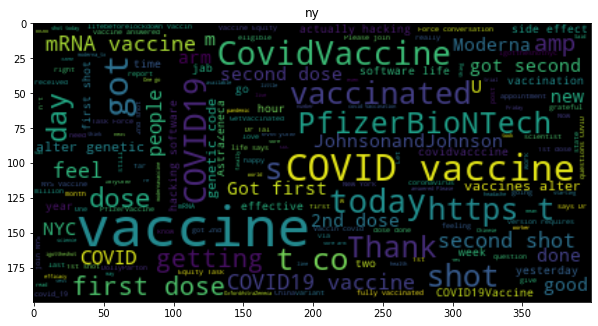

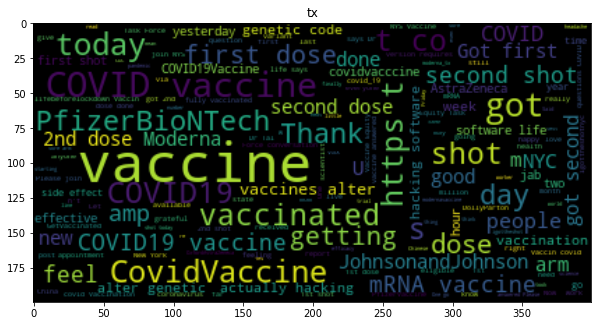

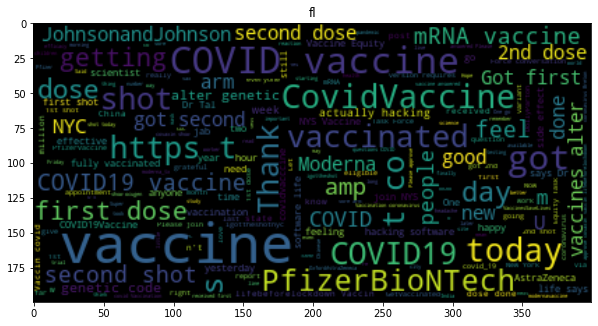

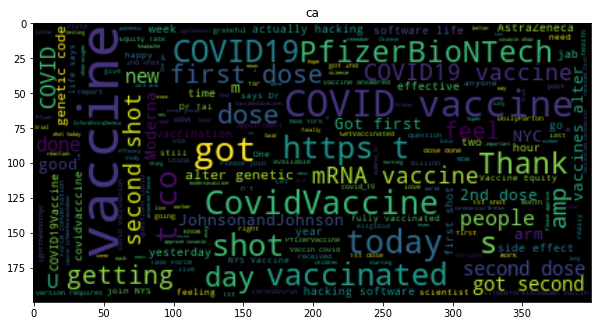

In [251]:
vaccwords = ['pfizer', 'bioNTech', 'sinopharm', 'sinovac', 'moderna', 'oxford', 'astraZeneca', 'covaxin' 'sputnik V']
nyt_words = nyt.split()
resultwords  = [word for word in nyt_words if word.lower() not in vaccwords]
resultny = ' '.join(resultwords)

txt_words = txt.split()
resultwords  = [word for word in txt_words if word.lower() not in vaccwords]
resulttx = ' '.join(resultwords)

flt_words = flt.split()
resultwords  = [word for word in flt_words if word.lower() not in vaccwords]
resultfl = ' '.join(resultwords)

cat_words = cat.split()
resultwords  = [word for word in cat_words if word.lower() not in vaccwords]
resultca = ' '.join(resultwords)


wc = WordCloud(max_font_size=40).generate(resultny)
plt.figure(figsize=(10, 10))
plt.title("ny")
plt.imshow(wc, interpolation="bilinear")

wc = WordCloud(max_font_size=40).generate(resulttx)
plt.figure(figsize=(10, 10))
plt.title("tx")
plt.imshow(wc, interpolation="bilinear")

wc = WordCloud(max_font_size=40).generate(resultfl)
plt.figure(figsize=(10, 10))
plt.title("fl")
plt.imshow(wc, interpolation="bilinear")

wc = WordCloud(max_font_size=40).generate(resultca)
plt.figure(figsize=(10, 10))
plt.title("ca")
plt.imshow(wc, interpolation="bilinear")

In [259]:
import matplotlib.gridspec as gridspec

sid_ny = SentimentIntensityAnalyzer()
sid_tx = SentimentIntensityAnalyzer()
sid_fl = SentimentIntensityAnalyzer()
sid_ca = SentimentIntensityAnalyzer()

ny_pos = []
ny_neu = []
ny_neg = []
tx_pos = []
tx_neu = []
tx_neg = []
fl_pos = []
fl_neu = []
fl_neg = []
ca_pos = []
ca_neu = []
ca_neg = []

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

all_dates = []
curr_date = ''
inter = intersection(ny_date, ca_date)
inter1 = intersection(tx_date, fl_date)
ahhh = intersection(inter, inter1)
all_dates.append(ahhh)
all_dates = all_dates[0]
all_date = []
[all_date.append(x) for x in all_dates if x not in all_date]

###dictionary with all of the dates and the scores for that day

ny_as = {}
ca_as = {}
tx_as = {}
fl_as = {}

###get sentimental scores for the specific dates
for date in all_date:
    tweets = []
    ###go thru ny_date and compare it to the date in all_dates
    for i in range(len(ny_date)):
        if date == ny_date[i]:
            ###get the text from that tweet and put it in tweets
            tweets.append(ny_text[i])
    scores = []
    twets = " ".join(tweets)
    ny_text_tokens = word_tokenize(twets)
    ny_tokens_without_sw = [word for word in ny_text_tokens if not word in stopwords.words()]
    twetxt = " ".join(ny_tokens_without_sw)
    analysis = sid_ny.polarity_scores(twetxt)
    ah = {k: analysis[k] for k in list(analysis)[:3]}
    q = list(ah.values())
    scores.append(q[0])
    scores.append(q[1])
    scores.append(q[2])
    ny_as.update({date:scores})

for date in all_date:
    tweets = []
    ###go thru ny_date and compare it to the date in all_dates
    for i in range(len(ca_date)):
        if date == ca_date[i]:
            ###get the text from that tweet and put it in tweets
            tweets.append(ca_text[i])
    scores = []
    twets = " ".join(tweets)
    ca_text_tokens = word_tokenize(twets)
    ca_tokens_without_sw = [word for word in ca_text_tokens if not word in stopwords.words()]
    twetxt = " ".join(ca_tokens_without_sw)
    analysis = sid_ca.polarity_scores(tweets[0])
    ah = {k: analysis[k] for k in list(analysis)[:3]}
    q = list(ah.values())
    scores.append(q[0])
    scores.append(q[1])
    scores.append(q[2])
    ca_as.update({date:scores})
    
for date in all_date:
    tweets = []
    ###go thru ny_date and compare it to the date in all_dates
    for i in range(len(fl_date)):
        if date == fl_date[i]:
            ###get the text from that tweet and put it in tweets
            tweets.append(fl_text[i])
    scores = []
    twets = " ".join(tweets)
    fl_text_tokens = word_tokenize(twets)
    fl_tokens_without_sw = [word for word in fl_text_tokens if not word in stopwords.words()]
    twetxt = " ".join(fl_tokens_without_sw)
    analysis = sid_fl.polarity_scores(tweets[0])
    ah = {k: analysis[k] for k in list(analysis)[:3]}
    q = list(ah.values())
    scores.append(q[0])
    scores.append(q[1])
    scores.append(q[2])
    fl_as.update({date:scores})
    
for date in all_date:
    tweets = []
    ###go thru ny_date and compare it to the date in all_dates
    for i in range(len(tx_date)):
        if date == tx_date[i]:
            ###get the text from that tweet and put it in tweets
            tweets.append(tx_text[i])
    scores = []
    twets = " ".join(tweets)
    tx_text_tokens = word_tokenize(twets)
    tx_tokens_without_sw = [word for word in tx_text_tokens if not word in stopwords.words()]
    twetxt = " ".join(tx_tokens_without_sw)
    analysis = sid_tx.polarity_scores(tweets[0])
    ah = {k: analysis[k] for k in list(analysis)[:3]}
    q = list(ah.values())
    scores.append(q[0])
    scores.append(q[1])
    scores.append(q[2])
    tx_as.update({date:scores})
    
# analysis = sid_ny.polarity_scores(nyt)
# ah = {k: analysis[k] for k in list(analysis)[:3]}
# q = list(ah.values())
# ny_pos.append(q[0])
# ny_neu.append(q[1])
# ny_neg.append(q[2])
    
# analysis = sid_tx.polarity_scores(txt)
# ah = {k: analysis[k] for k in list(analysis)[:3]}
# q = list(ah.values())
# tx_pos.append(q[0])
# tx_neu.append(q[1])
# tx_neg.append(q[2])

# analysis = sid_fl.polarity_scores(flt)
# ah = {k: analysis[k] for k in list(analysis)[:3]}
# q = list(ah.values())
# fl_pos.append(q[0])
# fl_neu.append(q[1])
# fl_neg.append(q[2])

# analysis = sid_ca.polarity_scores(cat)
# ah = {k: analysis[k] for k in list(analysis)[:3]}
# q = list(ah.values())
# ca_pos.append(q[0])
# ca_neu.append(q[1])
# ca_neg.append(q[2])


Good heavens - stupid reason even slow day . get dummy # pademics slither away alr… The newly approved # Vaccine # CCPVirus start distributed US states Dec. 14 , according of…
The # USA government prepping millions doses # PfizerBioNTech coronavirus # vaccine shipment sites… First Vaccine Shots US Watch video https : //t.co/MxBSjGgk87 # FirstVaccineShots # COVID # COVID19… About 3 million doses # PfizerBioNTech COVID # vaccine set reach facilities across US Monday , m… Assume # SecretSpreader post # vaccine ? Do test POS/NEG w/live virus & amp ; vax ? TBD # COVID19… Assume # SecretSpreader post # vaccine ? Do test POS/NEG w/live virus & amp ; vax ? TBD # COVID19… I scheduled # COVID19 # vaccine today🤞💪 , # cardiotwitter ? # PfizerBioNTech # Pfizervaccine…
Snow storm # NYC # pandemic # weather # newyork # snowing # winter # darkwinter # vaccinated # PfizerBioNTech Snow storm # NYC # pandemic # weather # newyork # snowing # winter # darkwinter # vaccinated # PfizerBioNTech Great trolling

Moderna vaccine side effects : 2nd shot- day started fine . As day progressed I started w horrible headaches , … @ chivon2go @ RuledByMyCat @ mlegault85 @ RStevens136 @ megoing @ DonnaWr93644707 @ BBnBeatles @ BBbandry27 @ zzachammer sid… @ chivon2go @ RuledByMyCat @ mlegault85 @ RStevens136 @ megoing @ DonnaWr93644707 @ BBnBeatles @ BBbandry27 @ zzachammer In… # Pfizer # Moderna # vaccines use similar mRNA technology . The # JohnsonandJohnson # OxfordAstraZeneca vaccine s… Research reported @ nature 20 participants showed neutralizing activity # modernavaccine and… A proud day country # Africa . Thank-you much @ PdgePrensa capturing historic day H.E . Obi… @ nyctaxicabtales Chick @ WHO Infectious discusses # Doctor Said : Thanks To # Russian # Sputnicv And # Chinese # Sinovac A… @ nyctaxicabtales Chick @ WHO Infectious discusses # Doctor Said : Thanks To # Russian # Sputnicv And # Chinese # Sinovac A… @ PDChina # Sinovac # COVID19 low-quality Chinese made substandard vaccine # China s

$ rnrna 3 weeks ago current vaccine work new # COVID19 variants , n't ! This company is… If test results positive , # Moderna said would seek U.S. regulatory authorization new vaccine , which… If test results positive , # Moderna said would seek U.S. regulatory authorization new vaccine , which… I got Pfizer Biontech Covid-19 vaccine @ javitscenter today ... It remarkable , significant , red-letter da… COVID : China ’ domestic vaccination options wide-ranging , hard cap estimate ~65 % popula… # Thursday “ Ok . I watching @ 12News says “ # johnsonandjohnson # COVID19Vaccine shot vaccine . Howeve… . @ moderna_tx 's Patrick Bergstedt talks commercializing COVID-19 vaccine . Listen ! # moderna… covid vaccine first dose ✔️ # vaccinessavelives # moderna # covidvaccine # besafe # bewell # wearamask 🥳👌🏻❤️🦠💉💪🏻🥳 @ Ess… # Pfizer , # Moderna maybe # J & amp ; J ? Right , best # vaccine get . # covid… # Pfizer , # Moderna maybe # J & amp ; J ? Right , best # vaccine get . # covid… Lots # COVID19 va

@ earthdogelevena 🙌🏾🙌🏾🙌🏾 Great ! 🙌🏾🙌🏾🙌🏾 I NEW issue . On cover—a Comment single-dose # OxfordAstraZeneca # COVID19 vaccine followed 12-week booster.… Eligible Brooklynites : latest available vaccination appointments SUNY Downstate Brooklyn U Hospital . Don ’ thr… I got first doze Covid vaccine today ! Ilk doz Pfizer asimi oldum 💉 # vaccinated # PfizerBioNTech 1st dose received . # vaccinated # Moderna 28 hours vaccine I 100 % . No residuals today , great . Everyone going react differently , … Fully vaccinated 💉 Got 2nd # Moderna shot today , would gladly gotten tho , - The… 1st 💉 administered ! # moderna Th This NO GOOD @ MayorMikeDuggan . You need lookat Johnson & amp ; Johnson vaccine differently would Pfizer an… This NO GOOD @ MayorMikeDuggan . You need lookat Johnson & amp ; Johnson vaccine differently would Pfizer an… Get test ! # covidteasting # flattenthecurve # weearamask # moderna
You ’ LOVE . https : //t.co/VKL1ZxZSKh Get linked : https : //t.co/IN9IezZ3GH # COVID19 # CovidRe

Hong Kong reports two deaths Covid-19 jabs . https : //t.co/i7zUZhIZKi via @ scmpnews # Hong Hong Kong reports two deaths Covid-19 jabs . https : //t.co/i7zUZhIZKi via @ scmpnews # Hong Since # HongKong began vaccinating public # China ’ domestically-produced # Sinovac COVID-19 vaccine , Cor… Day 2 - # COVID vaccine number 2 - # Moderna - sore arm I got shot- NOTHING -much easier… Skipped pre-work morning 💉 # moderna @ MuellerSheWrote I got Now I got # shot , time proper shot # moderna # science # bourbon # louisvillebourbon # ezrabrooks… @ AlexBerenson @ ScottGottlieb It 's 2nd dose finishes poor seniors handle GLYCOL the… @ JaniceDean It 's 2nd dose finishes poor seniors handle GLYCOL bloodstream it… @ islandlife2014 @ statnews @ SenSchumer @ LeaderMcConnell @ SenatorDurbin @ VP @ WHCOS @ PressSec It 's 2nd dose f… @ AlexBerenson @ nytimes @ WSJ @ DrEricDing @ WhiteHouse @ JoeBiden @ POTUS @ FoxNews @ CNN @ pfizer @ ScottGottliebMD… @ nprpolitics It 's 2nd dose finishes poor seniors 

39 Year Old Mother Dies After 2nd Dose Moderna Vaccine Family - https : //t.co/1owirsXPnt @ fox13 @ harrisonjaime My husband , & amp ; I got # Moderna shots today . Got 2nd # Moderna # CovidVaccine yesterday . Just bit sore tired today , otherwise fine ! My thanks the… @ thehill # mRNA # vaccines alter genetic code . “ We actually hacking software life , ” says Dr. Tal Zaks… Covid vaccine # 1 . Injected ! # COVID19 # COVIDVaccination # Moderna # vaccinated March 13 : record day vaccinations , ! 💪😎 # COVID19 # COVIDVaccination # Moderna # vaccinated @ thejomarie1 Got Friday . Not bad . Woke Saturday slight headache , sore arm little f…
What beautiful day ! # igottheshot # moderna @ Kaiser Permanente San Diego Medical Center Covid 19 vaccine done💪🏻👌🏻 # PfizerCovid @ theprincedylan Congrats ! I get dose two I got Covid arm First baby U.S. born antibodies # COVID19 mom receives dose # Moderna # vaccine pregnan… 1st dose - Vaccinated ! ! ! ! # COVID19Vaccine # MODERNA COVID vaccine side # M

Wow I ’ believe named two vaccines @ LilNasX ’ new single ! ! ! Congrat One # Moderna shot , go . Thank , Science , # DollyParton , @ turbovax , Duane Reade . 🌼🌷🌸 # Grateful One # Moderna shot , go . Thank , Science , # DollyParton , @ turbovax , Duane Reade . 🌼🌷🌸 # Grateful Did , . . . . . . . # covid19 # vaccine # moderna # igottheshotnyc @ Port Richmond High School Did , . . . . . . . # covid19 # vaccine # moderna # igottheshotnyc @ Port Richmond High School For first night Passover , I avoiding 12 plagues getting first dose Moderna ! 🦠💉… Got first shot Moderna vaccine today . The city vaccine hub I went efficient . Got shot seven… In breaking news day , I fully vaccinated ! A huge thanks researchers , doctors , vaccine ma… In breaking news day , I fully vaccinated ! A huge thanks researchers , doctors , vaccine ma… It ’ happy day🙌 I got second shot💉 I fight horrible virus killed many ’ … # IGotTheShotNYC💉 # Moderna💉 COVID Vaccine # vaccines available # costco Should I # pfizer ,
Fi

Pfizer , Moderna Vaccines Highly Effective Even After 1st Shot : US Study https : //t.co/iqCCYCTws6 via @ ndtv… First poke done ! 💉🦠🚫‼️ # moderna # Australia , # Pfizer # Moderna # vaccine appear effective . Tell WHICH ONE # PM got , which… Just received first dose COVID-19 vaccine NJ . The whole process took less 10 minutes besides 15 m… Hamilton Bennett , thank work creating # Moderna vaccine . I feel much gratitude focus af… Y ’ got anymore vaccines ? # vaccine # Pfizer # moderna # AstraZeneca Y ’ got anymore vaccines ? # vaccine # Pfizer # moderna # AstraZeneca Let ’ go ! # Moderna # GetVaccinated # HealthIsASpiritualMatter At second , VA , Mom get 2nd dose # Moderna vaccine . Also VA , Dad took 2nd dose… There scientific debate urgency second dose # Moderna # Pfizer vaccines.… There scientific debate urgency second dose # Moderna # Pfizer vaccines.… I received first , drive-thru , # Moderna vaccine ; held 15 minutes see there's… I received first , drive-thru , # Moderna vaccine ; 

Thank scientists developed # Moderna thank @ DollyParton contribut First dose # moderna # vaccine . Piece cake ! 💉😷 # getyourshot First dose # moderna # vaccine . Piece cake ! 💉😷 # getyourshot First First When I asked brother going vaccine replied `` fake real ? '' LMAO.… @ roywoodjr Shiiiiit .... first shot knocked Tuesday thoughts ? We talking # weather # covid_19 # vaccine # moderna # sleep @ pix11news see 5,6 10pm ! ! … Moderna , producer Covid-19 vaccines , hired Shannon Thyme Klinger chief legal officer corpo… I received second # Moderna Vax Sunday . I mild headache feel ' little ' woozy . Otherwise , I 'm fin Got 1st # Moderna Vaccine shot today 💉 many emotions . # COVID19 Got second shot Dolly vaccine @ ryanhealthnyc today ! ! ! # moderna # covidvacccine # nyc # newyork # newyorkcity… @ MarkLevineNYC Wish n't # JohnsonandJohnson vaccine , better nothing communities dif… ... ’ done ! Just got second dose Moderna vaccine ! # covid # covid19 # moderna # modernavacci Fellow New Yor

Second dose ! # Moderna # VaccinateNY # Queens Me streets right . Shot 💉 💉💉 - ✅ # Moderna # CVS @ cvspharmacy # Pfizer 's version requires 21-day space period first injection , # Moderna ’ version requires 28-… 🤟🏼Got FIRST shot 💉 # Moderna # COVID19 🦠 # vaccinated Get vaccinated people get back 2normal sooner tha… # cherryblossom # spring # nyc celebrating spring # 2ndcovidshot # teamdolly # moderna @ New York City , N.Y. # cherryblossom # spring # nyc celebrating spring # 2ndcovidshot # teamdolly # moderna @ New York City , N.Y . I 22.3 % ! Got second dose # Moderna vaccine morning . Thanks folks @ DuaneReade.… Thank @ jupitermedicalcenter thank Diane ! ! ! thank @ joebiden PLEASE GET VACCINATED ! ! ! ! Please ! ! # moderna… Finall NIH clinical trial evaluating Moderna COVID-19 variant vaccine begins https : //t.co/DAhDy7tvee I got first dose vaccine yesterday & amp ; arm Be grateful live age say `` I choose vaccine '' instead sounding like abs… What Moderna 's Covid jab mean UK vacci

I ’ two weeks second # Moderna shot , peak protection # vaccine , I guess . Only got ap… @ lainy71 @ BudGothmog44 1st shot , ’ feel thing . Arm , little sore next day . Second shot , slept 8hrs stra… For anyone first dose # moderna feel ? I ’ got stuffy nose 📷 Thank You Duane Reade Walgreens Well alright . About get 1st shot Moderna , NIAID COVID-19 vaccine… 📷 Thank You Duane Reade Walgreens Well alright . About get 1st shot Moderna , NIAID COVID-19 vaccine… Thank You Duane Reade Walgreens Well alright . About get 1st shot Moderna , NIAID COVID-19 vaccine… Thank You Duane Reade Walgreens Well alright . About get 1st shot Moderna , NIAID COVID-19 vaccine… COVID Vaccine today , 1st dose I feel . Anyone else ? # I ’ even wear condoms , would I get vaxxed # COVID19V First shot done ! # Moderna # COVID19Vaccine # cdc # thankyou So I got 2nd shot # Moderna yesterday 🎉🎉 Annnnd yeah , ’ basically like 1 ) I full-body workout yesterd… @ labyrin Has anyone experienced ? 2 days husband get 2nd Mo

Waiting outside line moved super quick . Got 2nd shot Moderna treated New York Chee… PROPAGANDA Covid19 vax injuries 57k + 2,342 deaths VAERS . Bloodclots 3 brands . ONLY guarantee… Got second # Moderna shot today - feeling like badas Tomorrow I ’ getting second # moderna shot . After I expect turn fluorescent green better connect… So glad I got # Moderna # COVID19 # vaccine yesterday since I ’ seen & amp ; ppl # NYC # StuyTown SO… Hey , remember smallpox ? Neither I , last known outbreak 1949 considered eradicated… I n't remember measles , mumps diphtheria . I DO remember chicken pox fucking vaccine… I GOT MY FIRST VACCINE ! ! 🥳 Thank # Moderna ! ! Thank @ sailorrooscout keeping people informed makin… Left arm fee @ JoyKOB Idk # Pfizer # Moderna My body ⌘+C COVID anti-bodies first jab ⌘+V heck . # nerdjokes… According study # Pfizer & amp ; # Moderna # mRNA vaccines safer means opening borders ! … Officially part @ moderna_tx gang ! Dose done dusted ! Round two May . 💖 I feel like I ’

In [247]:
print("New York Sentiment: ", ny_pos, " positive ", ny_neu, " neutral ", ny_neg, " negative ")
print("Texas Sentiment: ", tx_pos, " positive ", tx_neu, " neutral ", tx_neg, " negative ")
print("Florida Sentiment: ", fl_pos, " positive ", fl_neu, " neutral ", fl_neg, " negative ")
print("California Sentiment: ", ca_pos, " positive ", ca_neu, " neutral ", ca_neg, " negative ")

New York Sentiment:  []  positive  []  neutral  []  negative 
Texas Sentiment:  []  positive  []  neutral  []  negative 
Florida Sentiment:  []  positive  []  neutral  []  negative 
California Sentiment:  []  positive  []  neutral  []  negative 


In [262]:
###retrieve daily vaccinations

dff = pd.read_csv('twitter_data/us_state_vaccinations.csv')

us_vacc = dff.to_dict()

total_vacc_ny = []
total_vacc_ca = []
total_vacc_tx = []
total_vacc_fl = []

dates = us_vacc['date']
vaccs = us_vacc['daily_vaccinations']
locs = us_vacc['location']



for date in all_date:
    update_dates = []
    for i in range(len(dates)):
        if locs[i] == 'New York State':
            if date == dates[i]:
                total_vacc_ny.append(vaccs[i])
                update_dates.append(dates[i])
    if date not in update_dates:
        all_date.remove(date)
                
for date in all_date:
    update_dates = []
    for i in range(len(dates)):
        if locs[i] == 'Texas':
            if date == dates[i]:
                total_vacc_tx.append(vaccs[i])
                update_dates.append(dates[i])
    if date not in update_dates:
        all_date.remove(date)
                
for date in all_date:
    update_dates = []
    for i in range(len(dates)):
        if locs[i] == 'Florida':
            if date == dates[i]:
                total_vacc_fl.append(vaccs[i])
                update_dates.append(dates[i])
    if date not in update_dates:
        all_date.remove(date)
                
for date in all_date:
    update_dates = []
    for i in range(len(dates)):
        if locs[i] == 'California':
            if date == dates[i]:
                total_vacc_ca.append(vaccs[i])
                update_dates.append(dates[i])
    if date not in update_dates:
        all_date.remove(date)
            

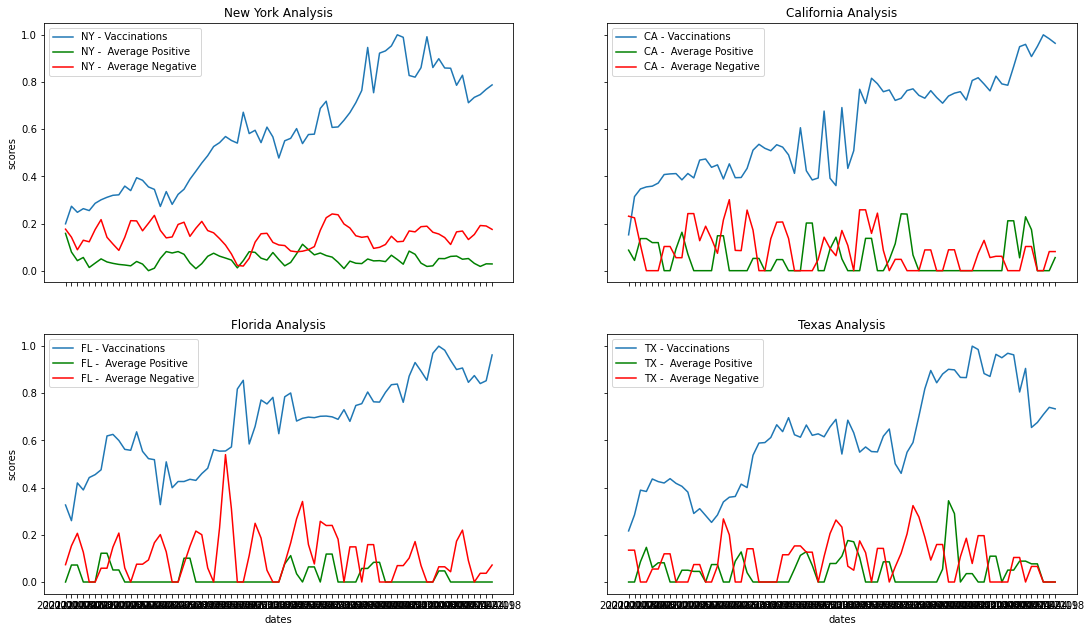

In [274]:
import matplotlib.pyplot as plt

total_vacc_ny = [float(i)/max(total_vacc_ny) for i in total_vacc_ny]

fig, axs = plt.subplots(2, 2)

x1 = all_date
y1 = total_vacc_ny
axs[0, 0].plot(x1, y1, label = "NY - Vaccinations")

x2 = all_date

pos_ny = []
neu_ny = []
neg_ny = []

p_av = []
n_av = []
nn_av = []

for i in all_date:
    moods = ny_as.get(i)
    pos_ny.append(moods[0])
    neu_ny.append(moods[1])
    neg_ny.append(moods[2])
    if len(pos_ny) > 1:
        newp = sum(pos_ny[-2:])/2
        newn = sum(neu_ny[-2:])/2
        newnn = sum(neg_ny[-2:])/2
    else:
        newp = sum(pos_ny)/len(pos_ny)
        newn = sum(neu_ny)/len(neu_ny)
        newnn = sum(neg_ny)/len(neg_ny)
    p_av.append(newp)
    n_av.append(newn)
    nn_av.append(newnn)

axs[0, 0].plot(x2, p_av, label = "NY -  Average Positive", color="green")
# axs[0, 0].plot(x2, n_av, label = "NY -  Average Neutral", color="orange")
axs[0, 0].plot(x2, nn_av, label = "NY -  Average Negative", color="red")
# plt.plot(x2, p_av, label = "NY -  Average Positive", color="green")
# plt.plot(x2, n_av, label = "NY - Average Neutral", color="orange")
# plt.plot(x2, nn_av, label = "NY - Average Negative", color='red')

axs[0, 0].set_title('New York Analysis')
axs[0, 0].legend()

total_vacc_ca = [float(i)/max(total_vacc_ca) for i in total_vacc_ca]


x1 = all_date
y1 = total_vacc_ca
axs[0, 1].plot(x1, y1, label = "CA - Vaccinations")

x2 = all_date

pos_ca = []
neu_ca = []
neg_ca = []

p_av = []
n_av = []
nn_av = []

for i in all_date:
    moods = ca_as.get(i)
    pos_ca.append(moods[0])
    neu_ca.append(moods[1])
    neg_ca.append(moods[2])
    if len(pos_ca) > 1:
        newp = sum(pos_ca[-2:])/2
        newn = sum(neu_ca[-2:])/2
        newnn = sum(neg_ca[-2:])/2
    else:
        newp = sum(pos_ca)/len(pos_ca)
        newn = sum(neu_ca)/len(neu_ca)
        newnn = sum(neg_ca)/len(neg_ca)
    p_av.append(newp)
    n_av.append(newn)
    nn_av.append(newnn)
    
axs[0, 1].plot(x2, p_av, label = "CA -  Average Positive", color="green")
# axs[0, 1].plot(x2, n_av, label = "CA -  Average Neutral", color="orange")
axs[0, 1].plot(x2, nn_av, label = "CA -  Average Negative", color="red")
# plt.plot(x2, p_av, label = "CA -  Average Positive", color="green")
# plt.plot(x2, n_av, label = "CA - Average Neutral", color="orange")
# plt.plot(x2, nn_av, label = "CA - Average Negative", color='red')

axs[0, 1].set_title('California Analysis')
axs[0, 1].legend()

total_vacc_fl = [float(i)/max(total_vacc_fl) for i in total_vacc_fl]


x1 = all_date
y1 = total_vacc_fl
axs[1, 0].plot(x1, y1, label = "FL - Vaccinations")

x2 = all_date

pos_fl = []
neu_fl = []
neg_fl = []

p_av = []
n_av = []
nn_av = []

for i in all_date:
    moods = fl_as.get(i)
    pos_fl.append(moods[0])
    neu_fl.append(moods[1])
    neg_fl.append(moods[2])
    if len(pos_ny) > 1:
        newp = sum(pos_fl[-2:])/2
        newn = sum(neu_fl[-2:])/2
        newnn = sum(neg_fl[-2:])/2
    else:
        newp = sum(pos_fl)/len(pos_fl)
        newn = sum(neu_fl)/len(neu_fl)
        newnn = sum(neg_fl)/len(neg_fl)
    p_av.append(newp)
    n_av.append(newn)
    nn_av.append(newnn)
    
axs[1, 0].plot(x2, p_av, label = "FL -  Average Positive", color="green")
# axs[1, 0].plot(x2, n_av, label = "FL -  Average Neutral", color="orange")
axs[1, 0].plot(x2, nn_av, label = "FL -  Average Negative", color="red")
# plt.plot(x2, p_av, label = "FL -  Average Positive", color="green")
# plt.plot(x2, n_av, label = "FL - Average Neutral", color="orange")
# plt.plot(x2, nn_av, label = "FL - Average Negative", color='red')

axs[1, 0].set_title('Florida Analysis')
axs[1, 0].legend()

total_vacc_tx = [float(i)/max(total_vacc_tx) for i in total_vacc_tx]


x1 = all_date
y1 = total_vacc_tx
axs[1, 1].plot(x1, y1, label = "TX - Vaccinations")

x2 = all_date

pos_tx = []
neu_tx = []
neg_tx = []

p_av = []
n_av = []
nn_av = []

for i in all_date:
    moods = tx_as.get(i)
    pos_tx.append(moods[0])
    neu_tx.append(moods[1])
    neg_tx.append(moods[2])
    if len(pos_ny) > 1:
        newp = sum(pos_tx[-2:])/2
        newn = sum(neu_tx[-2:])/2
        newnn = sum(neg_tx[-2:])/2
    else:
        newp = sum(pos_tx)/len(pos_tx)
        newn = sum(neu_tx)/len(neu_tx)
        newnn = sum(neg_tx)/len(neg_tx)
    p_av.append(newp)
    n_av.append(newn)
    nn_av.append(newnn)
    
axs[1, 1].plot(x2, p_av, label = "TX -  Average Positive", color="green")
# axs[1, 1].plot(x2, n_av, label = "TX -  Average Neutral", color="orange")
axs[1, 1].plot(x2, nn_av, label = "TX -  Average Negative", color="red")
# plt.plot(x2, p_av, label = "TX -  Average Positive", color="green")
# plt.plot(x2, n_av, label = "TX - Average Neutral", color="orange")
# plt.plot(x2, nn_av, label = "TX - Average Negative", color='red')

axs[1, 1].set_title('Texas Analysis')
axs[1, 1].legend()



for ax in axs.flat:
    ax.set(xlabel='dates', ylabel='scores')

for ax in axs.flat:
    ax.label_outer()
    
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('analysis.png', dpi=100)

In [273]:
print(pos_ny[-2:])

[0.035, 0.022]
